# Output and preview workflow DAG

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * option `-d` output DAGs of workflow at different stages of execution
  * `%preview` magic can preview the generated DAGs in an animation format  

## Output DAG of execution

SoS allows the output of Direct Acyclic Graph in [graphviz dot format](http://www.graphviz.org/content/dot-language) of the execution of the workflow using option `-d`. DAGs would be written to standard output if the option `-d` is given without value, and to a file if a filename is given. Because of the dynamic nature of SoS, multiple DAGs will be written to the output.

Magic `%preview` converts the `.dot` file to a `.gif` animation and display it in the notebook, which is a great way to show the relationship betwen steps of workflows, and the order at which the workflows are executed.

Let us create an example with some nodes, and execute the workflow with two targets `B2.txt` and `C2.txt`

> dag.dot (580 B):

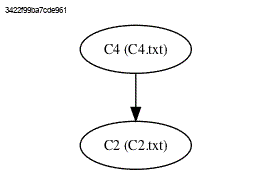

In [1]:
%preview -n dag.dot

!rm -f A?.txt B?.txt C?.txt
%run  -t B2.txt C2.txt -d dag.dot -v1
[A_1]
input: 'B1.txt'
output: 'A1.txt'
sh:
    touch A1.txt

[A_2]
depends:  'B2.txt'
sh:
    touch A2.txt

[B1: provides='B1.txt']
depends: 'B2.txt'
sh:
    touch B1.txt

[B2: provides='B2.txt']
depends: 'B3.txt', 'C1.txt'
sh:
    touch B2.txt

[B3: provides='B3.txt']
sh:
    touch B3.txt

[C1: provides='C1.txt']
depends: 'C2.txt', 'C3.txt'
sh:
    touch C1.txt

[C2: provides='C2.txt']
depends: 'C4.txt'
sh:
    touch C2.txt

[C3: provides='C3.txt']
depends: 'C4.txt'
sh:
    touch C3.txt

[C4: provides='C4.txt']
sh:
    touch C4.txt


## Further reading

* [Generate a report for workflow execution](workflow_report.html)